---
<span style="font-size:x-large;">Census Lab Assignment</span>

Task: Investigate the similarities and difference between the United States and Australia. Use census data provided by the Australian Bureau of Statistics (ABS) and the United States Census Bureau to derive insights.

### Declaration

We are aware of the University’s [policy on academic conduct](https://www.governance.uwa.edu.au/procedures/policies/policies-and-procedures?method=document&id=UP07/21) and we declare that this assignment is our own work entirely and that suitable acknowledgement has been made for any sources of information used in preparing it. We have retained a hard copy for my own records.

Names: Kashish Patel, Hassan Hassan and Alexia Fassetta. 

Date: 09/09/22

---

# Multiculturalism: Australia VS America

---

## Context
This report seeks to investigate Multiculturalism in Australia and America. 

We will invesitagte this through investigating migration, globalisation and the associated multiculturalism. 

Australia was developed by foreign born immigrants, who have contributed to our cultural identity, finacial prosperity and 
    1) The age group in which they arrived
    2) The Year in which they arrived
    3) Lastly, we will support this by utilising key statistics of  proficiency of langauge.

---

## Data Acquisition

The Data used for Australia's Analysis was collected from the [ABS 2021 Census DataPacks](>> provide link?? ). 

To derive our data please select the following for the next 3 steps:
- Census Year: **2021 Census Datapacks**
- DataPacks Type: **General Community Profile**
- Geography: **Australia**

We will be analysiing the follo
- **G09**: *Country of Birth of Person by Age by Sex*
- **G10**: *Country of Birth by Year of Arrival in Australia*
- **G13**: *Language used at home by proficiency in spoken English by sex* 


This data provides information to allow us to conduct our analysis:
- Country of birth
- Gender
- Year of arrival
- Age at immigration

---
Firstly we will read in the required packages and import the required software

In [421]:
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Australia
## Data Cleaning/Conversion

Read in all the appropriate files. Create a list for each Category, this list will hold all of the appropriate files, enabling us to iterate over these lists.

In [422]:

AUS_FILES = {
    # PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN THE UNITED STATES
    "G09_FILES": ["AUS census Data/2021Census_G09F_AUS_AUS.csv",
                  "AUS census Data/2021Census_G09G_AUS_AUS.csv",
                  "AUS census Data/2021Census_G09H_AUS_AUS.csv",
                  ],
    # YEAR OF ARRIVAL FOR THE FOREIGN-BORN POPULATION IN AUSTRALIA
    "G10_FILES": ["AUS census Data/2021Census_G10A_AUS_AUS.csv",
                  "AUS census Data/2021Census_G10B_AUS_AUS.csv",
                  "AUS census Data/2021Census_G10C_AUS_AUS.csv"]
}

# PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN THE UNITED STATES
US_FILES = {
    "POB_for_FB": [
        'US data/POB_by_Sex_Age.csv'
    ],
    'Age_by_FB': ['US data/ACSDT1Y2019.B05013-2022-09-08T093031.csv']
}


Create function to read and organise each file.

In [423]:
filename = "AUS census Data/2021Census_G13A_AUS_AUS.csv"


In [424]:
def read_file(filename):
    """
    Reads in a file, removing the first column of each row ("AUS_CODE_2020"). Returns a list containing a list of every row.
    """
    with open(filename, 'r') as file:
        contents = file.readlines()

    for (index, value) in enumerate(contents):
        contents[index] = value.strip("\n").split(",")[1:]
    return contents


filename = "AUS census Data/2021Census_G09H_AUS_AUS.csv"
a = read_file(filename)
b = a[0]
# print(b)


Next we will create a dictionary to establish a key/ value pair relationship

In [425]:
def create_dictionary(keys, value, dictionary):
    """
    Takes two lists (one of keys and the other of values) and adds to specified dictionary
    """
    for (index, key) in enumerate(keys):  # enumerate maintains a counter as a key for each value within an object, allowing easier access to items
        dictionary[key] = value[index]
    return dictionary


Lets use our functions to investigate the data structure, organisation and cleaning required.

Print a temp sample of the first and last 10 cells for each data file

In [426]:
G09 = {}
G10 = {}

for file in AUS_FILES['G09_FILES']:
    temp09 = read_file(file)
    G09 = create_dictionary(temp09[0], temp09[1], G09)

for file in AUS_FILES['G10_FILES']:
    temp10 = read_file(file)
    G10 = create_dictionary(temp10[0], temp10[1], G10)


Lets observe the data we are working with:

In [427]:
print("Beginning of G09 headers: ", list(G09)[
      :20], '\n,' "\nEnd of G09 headers: ", list(G09)[len(G09)-20:])
print("Beginning of G10 headers: ", list(G10)[
      :20], '\n,' "\nEnd of G10 headers: ", list(G10)[len(G10)-20:])


Beginning of G09 headers:  ['F_Vietnam_0_4', 'F_Vietnam_5_14', 'F_Vietnam_15_24', 'F_Vietnam_25_44', 'F_Vietnam_45_54', 'F_Vietnam_55_64', 'F_Vietnam_65_74', 'F_Vietnam_75_84', 'F_Vietnam_85ov', 'F_Vietnam_Tot', 'F_Wales_0_4', 'F_Wales_5_14', 'F_Wales_15_24', 'F_Wales_25_44', 'F_Wales_45_54', 'F_Wales_55_64', 'F_Wales_65_74', 'F_Wales_75_84', 'F_Wales_85ov', 'F_Wales_Tot'] 
,
End of G09 headers:  ['P_COB_NS_0_4', 'P_COB_NS_5_14', 'P_COB_NS_15_24', 'P_COB_NS_25_44', 'P_COB_NS_45_54', 'P_COB_NS_55_64', 'P_COB_NS_65_74', 'P_COB_NS_75_84', 'P_COB_NS_85ov', 'P_COB_NS_Tot', 'P_Tot_0_4', 'P_Tot_5_14', 'P_Tot_15_24', 'P_Tot_25_44', 'P_Tot_45_54', 'P_Tot_55_64', 'P_Tot_65_74', 'P_Tot_75_84', 'P_Tot_85ov', 'P_Tot_Tot']
Beginning of G10 headers:  ['Afghanistan_Before_1951', 'Afghanistan_1951_1960', 'Afghanistan_1961_1970', 'Afghanistan_1971_1980', 'Afghanistan_1981_1990', 'Afghanistan_1991_2000', 'Afghanistan_2001_2010', 'Afghanistan_2011_2015', 'Afghanistan_2016', 'Afghanistan_2017', 'Afghanista

In [428]:
def clean_dictionary(from_dictionary):
    G09_Total = {}
    G09_AusPop = {}
    for (key, value) in from_dictionary.items():
        if "Australia" in key:
            G09_AusPop[key] = int(value)
        elif key[0] == "P":
            G09_Total[key] = int(value)
    return G09_Total, G09_AusPop


In [429]:
G09_Total, G09_AusPop = clean_dictionary(G09)
# print(G09_Total)
print("\n")
print(G09_AusPop)
G09_Total;




{'P_Australia_0_4': 1362761, 'P_Australia_5_14': 2711665, 'P_Australia_15_24': 2304028, 'P_Australia_25_44': 4157739, 'P_Australia_45_54': 2044555, 'P_Australia_55_64': 1861530, 'P_Australia_65_74': 1488499, 'P_Australia_75_84': 785817, 'P_Australia_85ov': 303836, 'P_Australia_Tot': 17020422}


In [430]:
def dictionary_by_country(dct):
    """
    Splits G09 by country. Returns dictionary containing dictionaries of countries for each age group
    """
    tmp_dct = {}

    start = 0        # first index
    stop = 10        # each country has 10 entries

    dct_lst = list(dct.items())

    while stop <= len(dct):
        country_dct = {}
        country_name = dct_lst[start][0].replace("_0_4", '').replace("P_", '')

        # Create the associated age groups
        for i in range(start, stop):
            key = dct_lst[i][0].replace(country_name, '').replace(
                "P__", '').replace("_", '-')
            value = int(dct_lst[i][1])
            country_dct[key] = value

        # create the country Name
        tmp_dct[country_name] = country_dct

        start += 10
        stop += 10
    return tmp_dct


Lets Observe our data:

In [449]:
G09_Complete = (dictionary_by_country(G09_Total))
print(list(G09_Complete))

['Afghanistan', 'Bangladesh', 'Bosnia_Herzegov', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China', 'Croatia', 'Egypt', 'England', 'Fiji', 'France', 'Germany', 'Greece', 'Hong_Kong_SAR_Ch', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy', 'Japan', 'Korea_South', 'Lebanon', 'Malaysia', 'Malta', 'Mauritius', 'Myanmar', 'Nepal', 'Netherlands', 'New_Zealand', 'North_Macedonia', 'Pakistan', 'PNG', 'Philippines', 'Poland', 'Samoa', 'Scotland', 'Singapore', 'South_Africa', 'Sri_Lanka', 'Taiwan', 'Thailand', 'Turkey', 'USA', 'Vietnam', 'Wales', 'Zimbabwe', 'Elsewhere', 'COB_NS', 'Tot']


In [432]:
print(list(G10)[0:16])


['Afghanistan_Before_1951', 'Afghanistan_1951_1960', 'Afghanistan_1961_1970', 'Afghanistan_1971_1980', 'Afghanistan_1981_1990', 'Afghanistan_1991_2000', 'Afghanistan_2001_2010', 'Afghanistan_2011_2015', 'Afghanistan_2016', 'Afghanistan_2017', 'Afghanistan_2018', 'Afghanistan_2019', 'Afghanistan_2020', 'Afghanistan_2021', 'Afghanistan_Yr_arrival_NS', 'Afghanistan_Tot']


In [433]:
def sum_years(dct):
    """
    Create 3 lists 
        - 1950 - 2000: Sums values from 1950 years before to 2000 and adds to dictionary, removing the original values
        - 2000 - 2010 
        - 2010 - 2020L Sums values from 2011 to 2020, removing the original values
    """
    tmp_dct = {}

    start = 1            # first index
    sum_start_2000 = 5
    sum_start_2010 = 9
    sum_start_2010 = 10  # begin adding of countries
    end_year_2020 = 14  # end adding of countries
    stop = 14

    dct_lst = list(dct.items())

    while stop <= len(dct):
        for i in range(start, sum_start):
            key = dct_lst[i][0]
            value = int(dct_lst[i][1])
            tmp_dct[key] = value

        # between 2000 and 2010
        total_sum = 0
        for j in range(sum_start_2000, sum_start_2010):
            total_sum += int(dct_lst[j][1])

        # betweem 2010 and 2020
        total_sum = 0
        for j in range(sum_start_2010, end_year_2020):
            total_sum += int(dct_lst[j][1])

        key = dct_lst[sum_start][0].replace(
            "2010", "2020").replace("_10", "_20")
        tmp_dct[key] = total_sum

        start += 14
        sum_start_2000 += 14
        stop += 14

    return tmp_dct


# America
## Data Cleaning/Conversion

In [434]:
def read_file_list(file: str) -> list:
    with open(file) as fin:
        __reader = list(csv.reader(fin, delimiter=','))
    return __reader


In [435]:


data_raw = read_file_list(US_FILES['POB_for_FB'][0])

del data_raw[:4]
header = [ re.sub(r'\([^)]*\)', '', head ) if not len(re.findall('\(.+\)',head)) != 0  else ' '.join(re.findall(r'\w{3,}', head)) for head in data_raw[0]]

del data_raw[0]

In [436]:
def clean_Name(name: str) -> str:
    return ' '.join(re.findall(r'\w+', name.replace('_', ' ')))


In [437]:
#
def create_List(data_raw_list):
    header_list = []
    value_list = []
    for item in data_raw_list[1:]:
        header_list.append(clean_Name(item[0]))
        value_list.append(int(item[1].replace(',', '')))
    data_list = [header_list, value_list]
    return data_list


def create_List_Sex(data_raw_list: list) -> list:
    data_raw_list
    #male_index = data_list.index('Male')
    #
    data_list = create_List(data_raw_list)

    male_index = data_list[0].index('Male')
    female_index = data_list[0].index('Female')

    return [male_index, female_index], data_list


In [438]:
def clean_Name_country(name:str)-> str:
    return ' '.join(re.findall(r'\w{3,}', name))

In [439]:
def map_to_dic(raw: list, header: list) -> dict:
    __Data = {name: [] for name in header}
    for __index, value in enumerate(header):
        if __index == 0:
            __Data[header[__index]] = np.array([clean_Name_country(row[__index]) for row in raw])
        else:
            __Data[header[__index]] = np.array([int(row[__index]) for row in raw])

    return __Data

In [440]:
Slice_list, Us_Age = create_List_Sex(
    read_file_list(US_FILES['Age_by_FB'][0]))
Slice_list

[1, 20]

In [441]:
def Sex_distro(slice_dic: list, Us_age: list):
    print(len(Us_age))
    male = {}
    female = {}
    male['Header'] = Us_age[0][slice_dic[0]+1: slice_dic[1]]
    male['Value'] = Us_age[1][slice_dic[0]+1: slice_dic[1]]

    female['Header'] = Us_age[0][slice_dic[1]+1:]
    female['Value'] = Us_age[1][slice_dic[1]+1:]

    return male, female


In [442]:

def get_row_value(data_list: list, row_num: int):
    return [data_list[key][row_num] for key in data_list.keys()]


print()


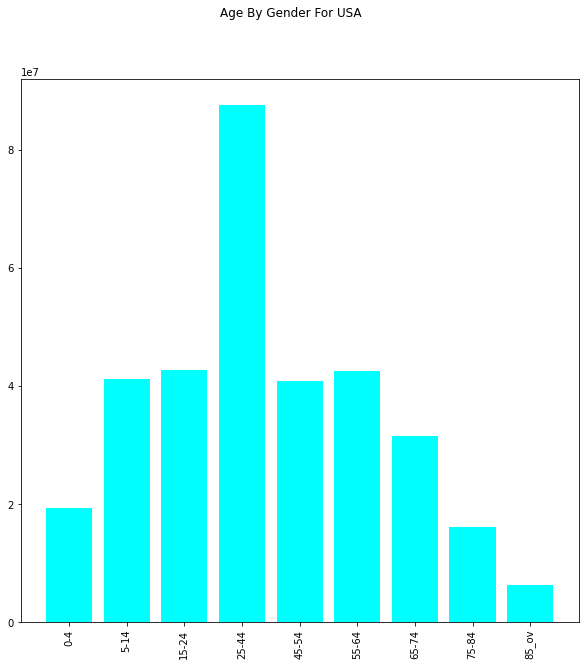

In [443]:
Us_POB_for_Age = map_to_dic(data_raw, header)
x = header[1:][:-1]
y = get_row_value(Us_POB_for_Age,0)[1:][:-1]

# plot
fig, ax = plt.subplots( figsize=(10, 10))
fig.suptitle('Age By Gender For USA')
plt.xticks(rotation=90)

width = 0.2

ax.bar(x, y,
          color='cyan', linewidth=0.7, label='Male')

#ax.set_xticklabels(ax.get_yticks(), rotation = 90)

plt.show()


# To Be Reomved - Testing

male, female = Sex_distro(Slice_list, Us_Age)


plot
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
fig.suptitle('Age By Gender For USA')
plt.xticks(rotation=90)
plt.xticks(rotation=90)

width = 0.2

ax[0].bar(male['Header'], male['Value'],
          color='cyan', linewidth=0.7, label='Male')
ax[1].bar(female['Header'], female['Value'],
          color='orange', linewidth=0.7, label='Female')

#ax.set_xticklabels(ax.get_yticks(), rotation = 90)

plt.show()


##### G10 To US

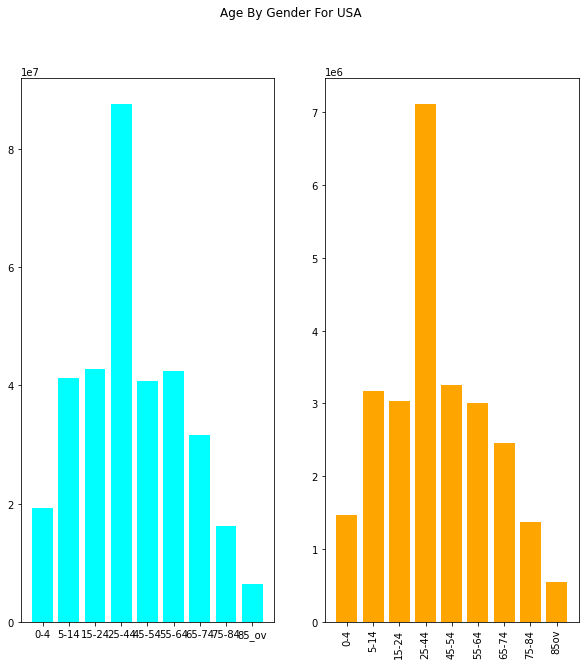

In [444]:
Us_POB_for_Age = map_to_dic(data_raw, header)
USA_X= header[1:][:-1]
USA_Y = get_row_value(Us_POB_for_Age,0)[1:][:-1]

AUS_X = list(G09_Complete['Tot'].keys())[:-1]
AUS_Y = list(G09_Complete['Tot'].values())[:-1]


fig, ax = plt.subplots(1, 2, figsize=(10, 10))
fig.suptitle('Age By Gender For USA')
plt.xticks(rotation=90)

width = 0.2

ax[0].bar(USA_X, USA_Y,
          color='cyan', linewidth=0.7, label='US')
ax[1].bar(AUS_X, AUS_Y,
          color='orange', linewidth=0.7, label='AUS')

#ax.set_xticklabels(ax.get_yticks(), rotation = 90)

plt.show()


## Data Analysis/Interpretation

In [478]:
US_country_list = map_to_dic(data_raw, header)['Place birth Recode'][1:]
bool_index = np.isin(US_country_list, list(dictionary_by_country(G09_Total).keys()))
AUS_dict = dictionary_by_country(G09_Total)
US_country_list[bool_index]

array(['France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands',
       'Poland', 'England', 'Scotland', 'Croatia', 'Afghanistan',
       'Bangladesh', 'Myanmar', 'Cambodia', 'China', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Japan', 'Lebanon', 'Malaysia', 'Nepal',
       'Pakistan', 'Philippines', 'Singapore', 'Taiwan', 'Thailand',
       'Turkey', 'Vietnam', 'Canada', 'Brazil', 'Chile', 'Egypt',
       'Zimbabwe', 'Fiji', 'Samoa'], dtype='<U44')

In [501]:
AUS_country_value_list = [AUS_dict[country]['Tot'] for country in US_country_list[bool_index]]
US_country_value_list = map_to_dic(data_raw, header)['Total'][1:][bool_index]


{'India': 2722343,
 'China': 2317522,
 'Philippines': 2166032,
 'Vietnam': 1418476,
 'Germany': 1142992,
 'Canada': 944972,
 'Brazil': 537566,
 'Japan': 532803,
 'Poland': 423173,
 'Pakistan': 413391,
 'Taiwan': 409442,
 'Iran': 404051,
 'England': 394814,
 'Italy': 394003,
 'Thailand': 276687,
 'Bangladesh': 260704,
 'Iraq': 243292,
 'Egypt': 228568,
 'France': 223188,
 'Nepal': 167408,
 'Cambodia': 153382,
 'Myanmar': 152385,
 'Turkey': 138174,
 'Afghanistan': 136795,
 'Greece': 132043,
 'Lebanon': 128473,
 'Ireland': 121450,
 'Indonesia': 107661,
 'Chile': 101653,
 'Netherlands': 101056,
 'Malaysia': 84059,
 'Scotland': 59608,
 'Fiji': 49909,
 'Singapore': 42268,
 'Croatia': 36360,
 'Zimbabwe': 20987,
 'Samoa': 13995}

#   Stacked Bar Plot

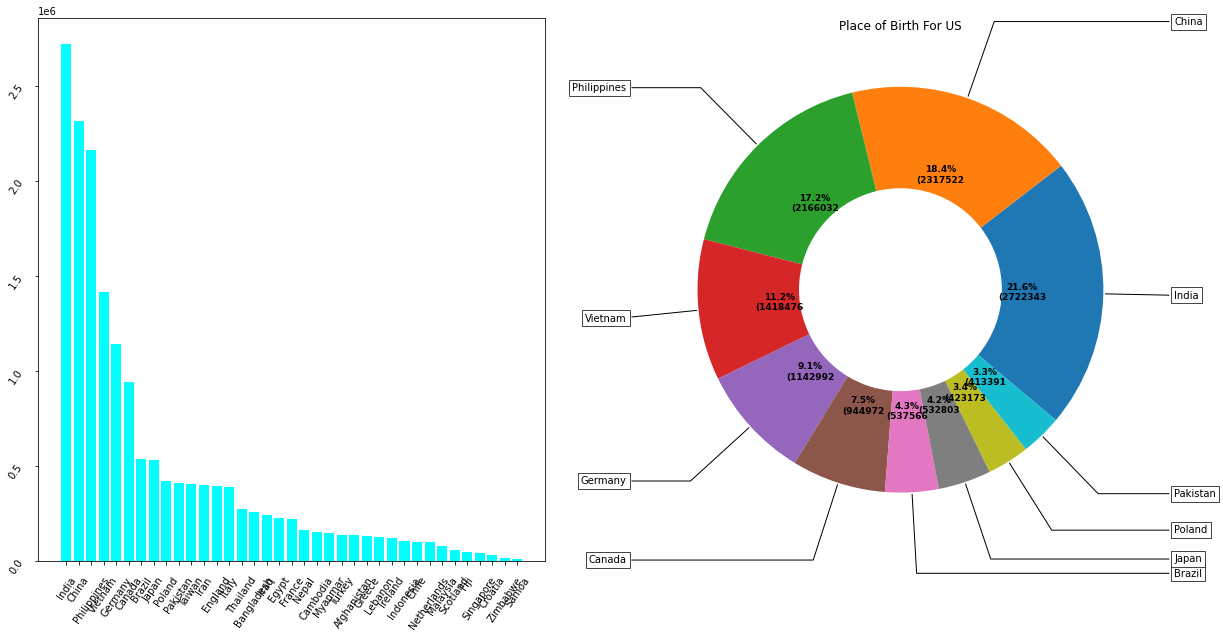

In [540]:
US_country_dict = dict(zip(US_country_list[bool_index], US_country_value_list))
sorted_dict = {k: v for k, v in sorted(US_country_dict.items(), key=lambda item: item[1], reverse=True)}

fig, ax = plt.subplots(1,2, figsize=(20, 10))


USA_X = list(sorted_dict.keys())
USA_Y = list(sorted_dict.values())

USA_X_pie = USA_X[:10]
USA_Y_pie = USA_Y[:10]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d}".format(pct, absolute)


# wedges, texts, autotexts = ax.pie(y, autopct=lambda pct: func(pct, y),
#                                   textprops=dict(color="w"))

# ax.legend(wedges, x,
#           title="Ingredients",
#           loc="center left",
#           bbox_to_anchor=(1, 0, 0.5, 1))

# plt.setp(autotexts, size=8, weight="bold")

# ax.set_title("Matplotlib bakery: A pie")

ax[0].bar(USA_X, USA_Y,
          color='cyan', linewidth=0.7, label='US')

wedges, texts, autotexts = ax[1].pie(USA_Y_pie, autopct=lambda pct: func(pct, USA_Y_pie),wedgeprops=dict(width=0.5), startangle=-40)




bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax[1].annotate(USA_X_pie[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax[0].tick_params(labelrotation=55, pad=10)

plt.setp(autotexts, size=9, weight="bold")
plt.title("Place of Birth For US")

plt.show()


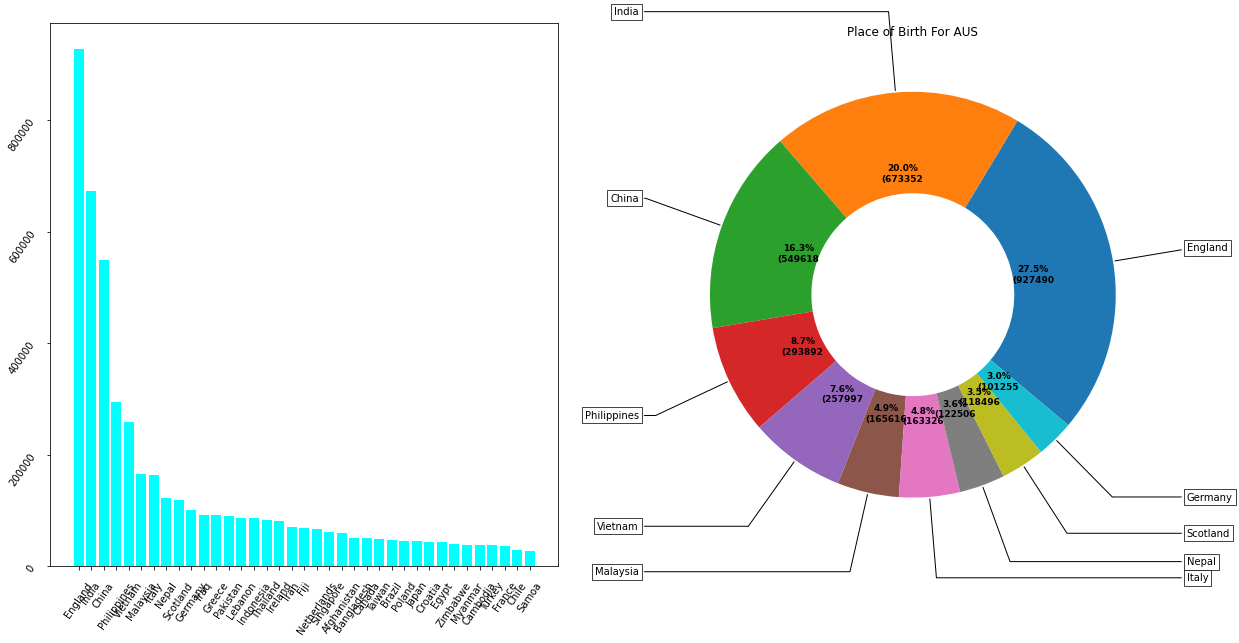

In [541]:
AUS_country_dict = dict(zip(US_country_list[bool_index], AUS_country_value_list))
sorted_dict = {k: v for k, v in sorted(AUS_country_dict.items(), key=lambda item: item[1], reverse=True)}

fig, ax = plt.subplots(1,2, figsize=(20, 10))


USA_X = list(sorted_dict.keys())
USA_Y = list(sorted_dict.values())

USA_X_pie = USA_X[:10]
USA_Y_pie = USA_Y[:10]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d}".format(pct, absolute)

ax[0].bar(USA_X, USA_Y,
          color='cyan', linewidth=0.7, label='US')

wedges, texts, autotexts = ax[1].pie(USA_Y_pie, autopct=lambda pct: func(pct, USA_Y_pie),wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax[1].annotate(USA_X_pie[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax[0].tick_params(labelrotation=55, pad=10)

plt.setp(autotexts, size=9, weight="bold")
plt.title("Place of Birth For AUS")

plt.show()


In [585]:
def zscore(value:list):
    value_arr = np.array(value)
    return (value_arr - np.mean(value_arr))/np.std(value_arr)

In [624]:
US_data = map_to_dic(data_raw, header)
india_age_group = {
    'US' : [],
    'AUS' : []
}

china_age_group = {
    'US' : [],
    'AUS' : []
}

index = np.where([US_data['Place birth Recode'][1:] == country for country in  ['India', 'China']] )

india_age_group['US'] = np.array([US_data[head][index[0][0]] for head in header[1:][:-1]])
india_age_group['AUS'] = np.array(list(dictionary_by_country(G09_Total)['India'].values())[:-1])
#   Chana_age_group with in us probulation
china_age_group['US'] = np.array([US_data[head][index[0][1]] for head in header[1:][:-1]])
china_age_group['AUS'] = np.array(list(dictionary_by_country(G09_Total)['China'].values())[:-1])
china_age_group

{'US': array([ 281531,  562507,  580054, 1141664,  565194,  636819,  569371,
         327622,  118300]),
 'AUS': array([  1875,  20206,  56384, 243970,  74649,  76298,  48562,  18472,
          9196])}

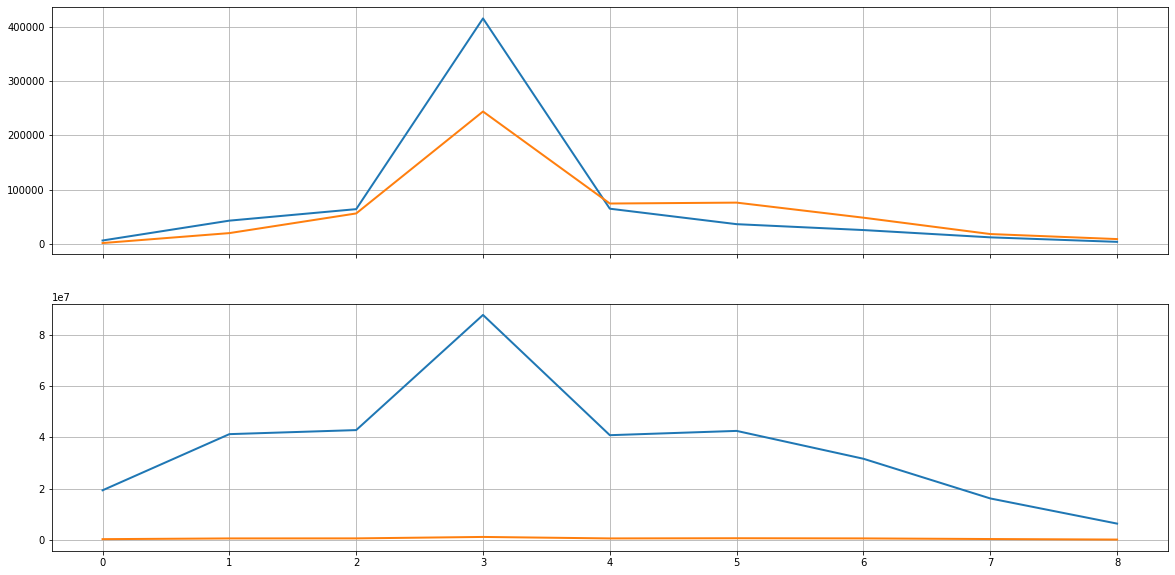

In [623]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True,figsize=(20, 10))


x = np.arange(len(india_age_group['US']))
ax1.plot(x, india_age_group['AUS'],lw=2)
ax1.grid(True)

ax1.plot(x, china_age_group['AUS'],lw=2)
ax1.grid(True)

ax2.plot(x, india_age_group['US'],lw=2)
ax2.grid(True)

ax2.plot(x, china_age_group['US'],lw=2)
ax2.grid(True)

#plt.xticks(header[1:][:-1])
plt.show()

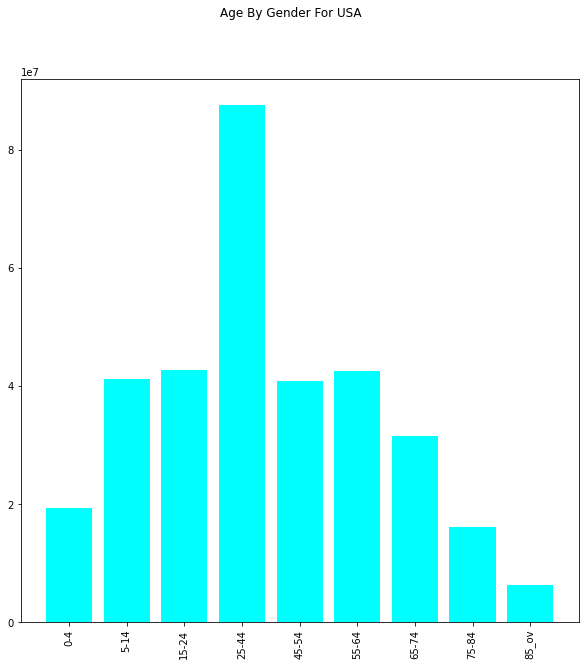

In [566]:
india_data = {
    'US' : [],
    'AUS' : []
}
index = np.where([US_data['Place birth Recode'][1:] == country for country in  ['India', 'China']] )
india_data ['US'] = [value[index[0][0]] for value in US_data['Place birth Recode'][1:] if value == 'India']


# plot
fig, ax = plt.subplots( figsize=(10, 10))
fig.suptitle('Age By Gender For USA')
plt.xticks(rotation=90)

width = 0.2

ax.bar(x, y,
          color='cyan', linewidth=0.7, label='Male')

#ax.set_xticklabels(ax.get_yticks(), rotation = 90)

plt.show()